# Tutorial: Vibration Energy Harvesting

In this tutorial, you will simulate energy harvesting using an harmonic oscillator. 


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import fftpack, signal
%matplotlib nbagg

## Ambient Acceleration 

We assume that the ambient acceleration available to our device is reproduced by the following function.

<IPython.core.display.Javascript object>


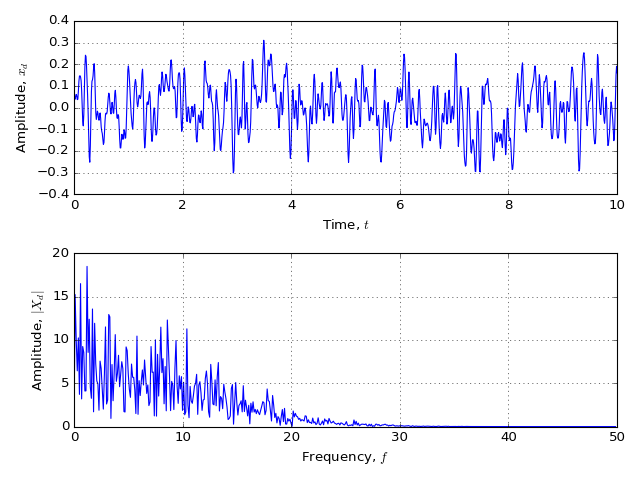

In [38]:
def noise(N = 1000, D = 10.):
    """
    Noise generator.
    
    Inputs:
    * N: number of samples.
    * D: signal duration.
    """
    N = int(N)
    dt = D / (N-1)
    t = np.linspace(0., 10., N)
    a = np.random.rand(N)
    a -= a.mean()
    A = fftpack.fft(a)
    F = fftpack.fftfreq(N, dt)
    win = fftpack.fftshift(signal.gaussian(N, std=N/10))
    A *= win
    a2 = fftpack.ifft(A)
    return t, np.real(a2), A[:N//2], F[:N//2]

t, a, A, F = noise()

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
plt.plot(t, a)
plt.grid()
plt.xlabel("Time, $t$")
plt.ylabel("Amplitude, $x_d$")
ax = fig.add_subplot(2,1,2)
plt.plot(F, abs(A))
plt.grid()
plt.xlabel("Frequency, $f$")
plt.ylabel("Amplitude, $|X_d|$")
plt.tight_layout()
plt.show()

## Mechanical harmonic oscillator

Your task is to maximize the power harvested by the harmonic oscillator that is described if the following equation:

$$
\ddot x + \dfrac{h}{m} \dot x + \dfrac{k}{m} x = -\ddot x_d
$$

Where:

* $x$ is the position,
* $\dot x$ and $\ddot x$ are respectively the speed and acceleration,
* $m = 1$ kg is the mass and is fixed,
* $h$ the harvesting term (can be tuned),
* $k$ the stiffness (can be tuned),
* and $\ddot x_d$ the driving acceleration which is null if the oscillator is free.

### Task 1: Harvested power

Find the equation that controls the power that is harvested by the oscillator.

### Task 2: Coding the harmonic oscillator

Use your work from tutorial #2 to code the harmonic oscillator and simulate it using the   the ambient acceleration defined above.

### Task 3: Measure the harvested power 

For a given configuration of $h/m$ and $k/m$, measure the power harvested by the oscillator.

### Task 4: Compute the harvested power as a function of $h/m$ and $k/m$

Test multiple combinations of $h/m$ and $k/m$ and find wich one is the best. You can compare your results with your colleagues.